# Project Overview

**Goal:**

The goal of this project is to analyze taxi service data in Chicago to uncover insights about ride patterns, evaluate taxi company performance, and test specific hypotheses related to ride durations. This analysis will help identify trends in ride frequency, popular locations, and potential factors influencing ride durations — such as weather conditions.

**Steps in the Project:**

**1- Data Preprocessing**
- Load and inspect datasets.
- Clean and prepare the data for analysis (handle missing values, convert data types, format strings, etc.).

**2- Exploratory Data Analysis (EDA)**
- Analyze taxi companies and ride counts.
- Identify top dropoff neighborhoods.
- Visualize ride distributions and company performance.

**3- Hypothesis Testing**
- Test whether ride durations from the Loop to O’Hare International Airport differ significantly on rainy Saturdays compared to non-rainy Saturdays.
- Use statistical testing (independent t-test) to confirm findings.

**Available Data:**

- /datasets/project_sql_result_01.csv: Taxi companies and number of rides.
- /datasets/project_sql_result_04.csv: Neighborhoods and average number of drop-offs.
- /datasets/project_sql_result_07.csv: Loop to O’Hare ride data with timestamps, durations, and weather conditions.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Exploratory data analysis 


In [2]:
#Load the datasets
companies = pd.read_csv('/datasets/project_sql_result_01.csv')
locations = pd.read_csv('/datasets/project_sql_result_04.csv')
rides = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
companies.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


In [4]:
locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


**Cleaning the data on both DF**

In [5]:
# Function to clean company names
def clean_company_name(name):
    # Remove any leading numbers and dashes
    names = re.sub(r'^[\s\d-]+|[\s\d-]+$', '', name)
    cleaned_name = re.sub(r'^\d+\s*-\s*', '', names)
    
    return cleaned_name.strip()

# Apply the function
companies['company_name'] = companies['company_name'].apply(clean_company_name)

#Round average_trips 
locations['average_trips'] = locations['average_trips'].round(1)
#convert average_trips to int
locations['average_trips'] = locations['average_trips'].astype(int)

In [6]:
companies.tail()

,company_name,trips_amount
59,Adwar H. Nikola,7
60,Benny Jona,7
61,Sergey Cab Corp.,5
62,Felman Corp,3
63,RC Andrews Cab,2


In [7]:
locations.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [8]:
#identify the top 10 locations in terms of drop-offs
top_locations = locations.sort_values(by='average_trips', ascending=False).head(10)
##identify the top 10 companies in terms of trips amount
top_companies = companies.sort_values(by='trips_amount', ascending=False).head(10)

In [9]:
top_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2421
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


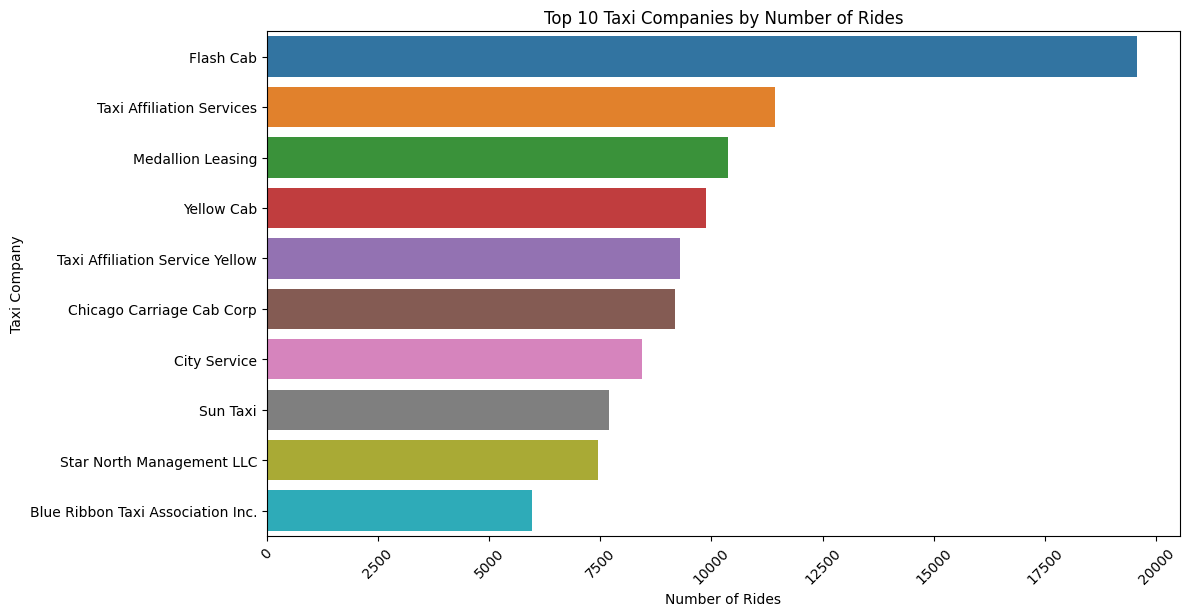

In [10]:
#Plot Taxi Companies vs. Number of Rides
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='trips_amount', y='company_name')
plt.title('Top 10 Taxi Companies by Number of Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Conclusion:**

- Flash Cab is the leading taxi company by a significant margin, providing nearly 20,000 rides.
- Taxi Affiliation Services and Medallion Leasing follow behind but still show strong numbers, with over 10,000 rides each.
- The bottom of the top 10 includes companies like Blue Ribbon Taxi Association Inc. and Star North Management LLC, with ride counts just under 8,000.

**Explanation:**

- The taxi industry in this dataset is dominated by a few key players, with a steep drop after the top 1.
- This may indicate brand dominance, stronger dispatch systems, or better fleet sizes for the top companies.
- Flash Cab’s leading position might be due to strategic positioning, better customer service, or wider coverage in high-demand areas.

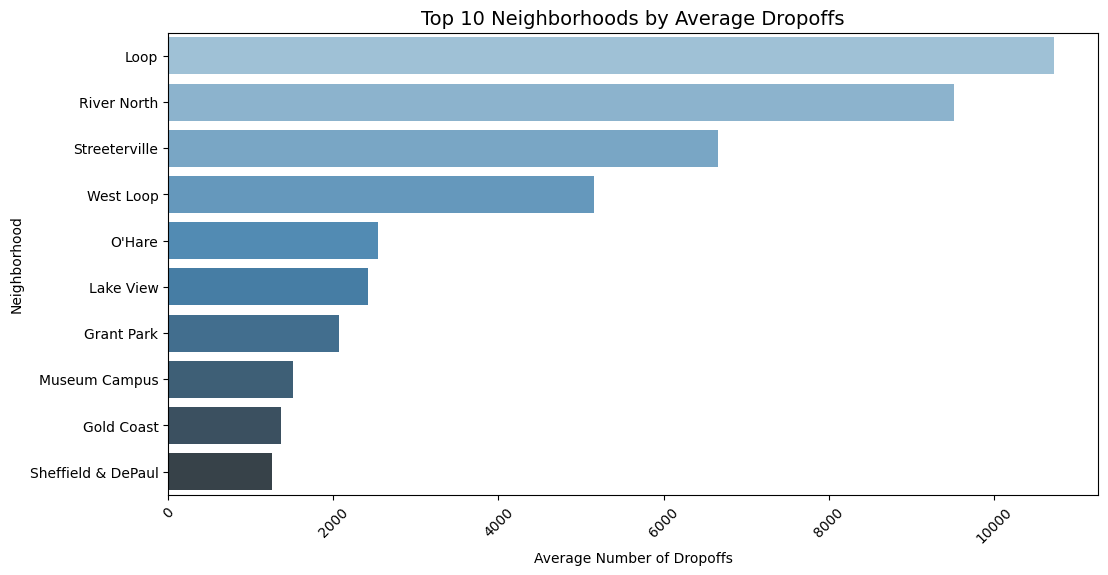

In [11]:
# Plot Top 10 Neighborhoods by Dropoffs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='average_trips', y='dropoff_location_name',palette='Blues_d')
plt.title('Top 10 Neighborhoods by Average Dropoffs', fontsize=14)
plt.xlabel('Average Number of Dropoffs')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

**Conclusion:**

- The Loop is the most frequently visited neighborhood, with an average of over 10,000 drop-offs, followed by River North and Streeterville.
- These areas are known commercial and business hubs, explaining the high taxi traffic.
- Neighborhoods like Gold Coast, Museum Campus, and Sheffield & DePaul make the lower end of the top 10, with 1,000–2,000 average drop-offs.

**Explanation:**

- The results highlight the central role of downtown areas in taxi demand. Areas like the Loop likely attract tourists, businesspeople, and locals alike.
- Airports (O'Hare) and residential/entertainment areas (Lake View, West Loop) also appear frequently, indicating balanced demand across commercial and lifestyle zones.
- The steep decline after the top 4 neighborhoods suggests concentration of activity in specific zones, useful for fleet optimization or marketing strategies.

# Testing hypotheses

**The goal to Test the hypothesis of The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays**

**Average duration of rides of rainy Saturdays and Non-rainy Saturdays the Same**
- Null Hypothesis (H₀): The average duration of rides for Rainy and Non-Rainy Saturdays are equal.
{H₀: μRainy = μNon-Rainy}
- Alternative Hypothesis (H₁): The average duration of rides for Rainy and Non-Rainy Saturdays are different.
{H₁: μRainy != μNon-Rainy}

**Cleaning the data on DF**

In [12]:
#check the duplicate 
rides_dup = rides[rides.duplicated()]
rides_dup

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [13]:
#drop duplicates
rides.drop_duplicates(inplace=True)

In [14]:
#check for missing values 
rides.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [15]:
#check the outliers by Statistical Approach to Detect Outliers
Q1 = rides['duration_seconds'].quantile(0.25)
Q3 = rides['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rides[(rides['duration_seconds'] < lower_bound) | (rides['duration_seconds'] > upper_bound)]
print(outliers)

                start_ts weather_conditions  duration_seconds
79   2017-11-11 15:00:00               Good            4800.0
276  2017-11-18 12:00:00                Bad            4980.0
354  2017-11-25 11:00:00               Good            7440.0
583  2017-11-11 16:00:00               Good            4980.0
619  2017-11-25 14:00:00               Good            6420.0
646  2017-11-11 13:00:00               Good            4380.0


In [16]:
#Remove the outliers 
rides_cleaned = rides[(rides['duration_seconds'] >= lower_bound) & (rides['duration_seconds'] <= upper_bound)]

**We are comparing ride durations on rainy Saturdays vs. non-rainy Saturdays, so we will form two groups:
Rides on rainy Saturdays & Rides on non-rainy Saturdays**

In [17]:
# Filter the ride durations rainy Saturdays & Rides on non-rainy Saturdays
rainy = rides[rides['weather_conditions'] == 'Bad']
non_rainy = rides[rides['weather_conditions'] == 'Good'] 

In [18]:
#Perform an independent t-test
t_stat_rainy, p_value_non_rainy = st.ttest_ind(rainy['duration_seconds'],non_rainy['duration_seconds'])

In [19]:
# Print results
print(f"T-Statistic (Rainy vs Non-Rainy): {t_stat_rainy:.4f}")
print(f"P-Value: {p_value_non_rainy:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value_non_rainy < alpha:
    print("Reject the null hypothesis: there IS a significant difference.")
else:
    print("Fail to reject the null hypothesis: NO significant difference.")


T-Statistic (Rainy vs Non-Rainy): 5.4280
P-Value: 0.0000
Reject the null hypothesis: there IS a significant difference.


# **Conclusion**


**Business Conclusions & Strategic Roadmap for Zuber in Chicago**

1. Focus on High-Demand Neighborhoods

Top-performing neighborhoods like Loop, River North, Streeterville, and West Loop consistently show the highest number of drop-offs.
Action: Prioritize driver deployment and promotions in these areas to maximize ride frequency and reduce idle time.

2.  Monitor and Benchmark Taxi Companies

A small number of companies dominate the market with the highest ride volumes.
Action: Zuber should benchmark these top companies’ pricing, response time, and service quality to identify competitive gaps and improvement areas.

3. Tailor Services to Weather Conditions

Hypothesis testing revealed that ride durations significantly increase on rainy Saturdays, especially for airport trips.
Action: Use weather forecasting to optimize dispatching, adjust pricing dynamically, and communicate ETA changes more transparently to users.

4. Improve Service to Underserved Neighborhoods

Many areas (e.g., Riverdale, Hegewisch, Burnside) have low ride volumes, which may be due to insufficient service availability.
Action: Explore demand patterns in these zones and assess the feasibility of expanding services or introducing shared ride options to increase coverage efficiently.

5. Use Data-Driven Dispatching and Incentives

With the insights from trip volumes and durations, Zuber can implement smart dispatching algorithms and offer driver incentives to align supply with demand hotspots.
Action: Leverage machine learning to predict ride demand based on time, day, and weather, ensuring operational efficiency.

6. Airport Route Optimization

O’Hare rides have a unique profile: longer average duration and sensitivity to weather conditions.
Action: Provide specialized services for airport runs—flat rates, luxury rides, and real-time ETA tracking—to stand out in this high-value route.


**Conclusion:**
By leveraging data analytics, Zuber can strategically optimize its operations, improve rider satisfaction, and gain a stronger foothold in the competitive Chicago taxi market. Prioritizing high-yield zones, refining operations under varying conditions, and expanding underserved markets are key to long-term growth and brand loyalty.